# COMS6998_015 Prac Deep Learning System HW1

Name: Allen Chen

UNI #: atc2160

Github:

- Everything used to produce this notebook: https://github.com/AllenChenCU/coms6998-dl-sys/tree/main/hw1

- All theory and code are in this notebook, except the code for problem 3. See the below link for problem 3 code.

- Code for Problem 3: https://github.com/AllenChenCU/coms6998-dl-sys/blob/main/hw1/prob3_code.py

## Problem 1 - Bias Variance Tradeoff, Regularization

### 1.1 Derive the bias-variance decomposition for a regression problem 

$\text{MSE} = \frac{1}{t} \sum_{i=1}^{t} (f(x_i) + \epsilon - g(x_i))^2$ 

$\mathbb{E}[\text{MSE}] = \mathbb{E}[\frac{1}{t} \sum_{i=1}^{t} (f(x_i) + \epsilon - g(x_i))^2]$ 

$\mathbb{E}[\text{MSE}] = \frac{1}{t} \mathbb{E}[\sum_{i=1}^{t} (f(x_i) - g(x_i))^2 + 2(f(x_i) - g(x_i))\epsilon + \epsilon^2]$ 

$\mathbb{E}[\text{MSE}] = \frac{1}{t} \mathbb{E}[\sum_{i=1}^{t} (f(x_i) - g(x_i))^2] + \mathbb{E}[\epsilon^2]$ 

$\mathbb{E}[\text{MSE}] = \frac{1}{t} \mathbb{E}[\sum_{i=1}^{t} (f(x_i) - g(x_i))^2] + \sigma^2$ 

$\mathbb{E}[\text{MSE}] = \frac{1}{t} \mathbb{E}[\sum_{i=1}^{t} (f(x_i) - \mathbb{E}[g(x_i)] + \mathbb{E}[g(x_i)] - g(x_i))^2] + \sigma^2$ 

$\mathbb{E}[\text{MSE}] = \frac{1}{t} \mathbb{E}[\sum_{i=1}^{t} (f(x_i) - \mathbb{E}[g(x_i)])^2 + 2(f(x_i) - \mathbb{E}[g(x_i)])(\mathbb{E}[g(x_i)] - g(x_i)) + (\mathbb{E}[g(x_i)] - g(x_i))^2] + \sigma^2$ 

$\mathbb{E}[\text{MSE}] = \frac{1}{t} \mathbb{E}[\sum_{i=1}^{t} (f(x_i) - \mathbb{E}[g(x_i)])^2 + (\mathbb{E}[g(x_i)] - g(x_i))^2] + \sigma^2$ 

$\mathbb{E}[\text{MSE}] = \frac{1}{t} \sum_{i=1}^{t} (f(x_i) - \mathbb{E}[g(x_i)])^2 + \frac{1}{t} \mathbb{E}[ \sum_{i=1}^{t} (\mathbb{E}[g(x_i)] - g(x_i))^2] + \sigma^2$ 

$\mathbb{E}[\text{MSE}] = Bias^2 + Variance + Noise$ 

### 1.2 Scatter plot for y and f(x)

$y(x) = x + sin(1.5x) + N(0, 0.3)$

$f(x) = x + sin(1.5x)$

     x          y       f(x)
0   10  11.009942  10.650288
1    1   2.058022   1.997495
2    0  -0.404395   0.000000
3    4   3.164831   3.720585
4    3   2.157397   2.022470
5    3   2.740578   2.022470
6    2   2.163936   2.141120
7    1   1.939259   1.997495
8   10  10.941554  10.650288
9    8   6.667288   7.463427
10   1   1.826454   1.997495
11   9  10.072367   9.803784
12   6   6.890502   6.412118
13   0  -0.131798   0.000000
14   0   0.206272   0.000000
15   1   2.133447   1.997495
16   3   2.450968   2.022470
17   3   1.412733   2.022470
18   8   7.774671   7.463427
19   9   8.974247   9.803784


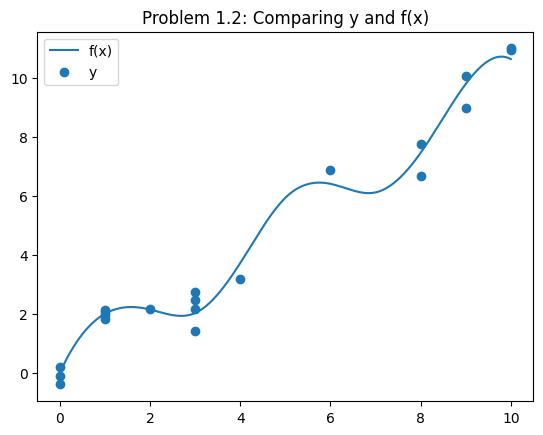

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

random.seed(42)

def y_func(x, mu, sigma):
    noise = random.gauss(mu=mu, sigma=sigma)
    return x + math.sin(1.5*x) + noise

def f_func(x):
    return x + math.sin(1.5*x)

MU = 0
SIGMA = math.sqrt(0.3)
N = 20
XMAX = 10

X = [random.randint(0, XMAX) for _ in range(N)]
Y = [y_func(x, MU, SIGMA) for x in X]
F = [f_func(x) for x in X]

# display dataset
dataset = pd.DataFrame({"x": X, "y": Y, "f(x)": F})
print(dataset)

# Plot
X_1 = np.arange(XMAX + 1)
F_1 = [f_func(x) for x in X_1]
x_smooth = np.linspace(0, XMAX, 500)
smooth_func = interp1d(X_1, F_1, kind='cubic')

plt.title("Problem 1.2: Comparing y and f(x)")
plt.plot(x_smooth, smooth_func(x_smooth), label="f(x)")
plt.scatter(X, Y, label="y")
plt.legend()
plt.show()

### 1.3 

$g_n(x) = B_0 + B_1x + B_2x^2 + ... + B_nx^n$

Model g_1 intercept: 0.026180552877201002
Model g_1 coeefficients: [1.01859347]
Model g_3 intercept: 0.3929045262658426
Model g_3 coeefficients: [ 0.          0.89013749 -0.055449    0.00731094]
Model g_10 intercept: -0.10997356210055464
Model g_10 coeefficients: [ 0.00000000e+00  2.39270701e+00  5.71449973e-01 -7.67018200e-01
 -5.73316016e-01  7.01805044e-01 -2.76610179e-01  5.62215600e-02
 -6.33669879e-03  3.75754822e-04 -9.14406761e-06]


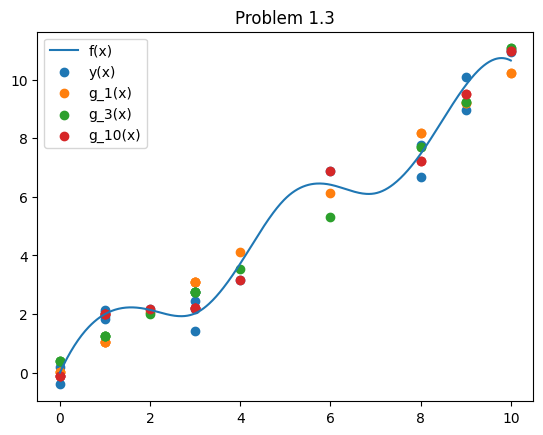

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


x_train = dataset[["x"]]
y_train = dataset["y"].values
f_train = dataset["f(x)"].values

# fit estimators
model_poly_1 = LinearRegression().fit(x_train, y_train)
dataset["g_1"] = model_poly_1.predict(x_train)
print(f"Model g_1 intercept: {model_poly_1.intercept_}")
print(f"Model g_1 coeefficients: {model_poly_1.coef_}")

x_train_poly_3 = PolynomialFeatures(degree=3).fit_transform(x_train)
model_poly_3 = LinearRegression().fit(x_train_poly_3, y_train)
dataset["g_3"] = model_poly_3.predict(x_train_poly_3)
print(f"Model g_3 intercept: {model_poly_3.intercept_}")
print(f"Model g_3 coeefficients: {model_poly_3.coef_}")

x_train_poly_10 = PolynomialFeatures(degree=10).fit_transform(x_train)
model_poly_10 = LinearRegression().fit(x_train_poly_10, y_train)
dataset["g_10"] = model_poly_10.predict(x_train_poly_10)
print(f"Model g_10 intercept: {model_poly_10.intercept_}")
print(f"Model g_10 coeefficients: {model_poly_10.coef_}")

# plot
X_1 = np.arange(XMAX + 1)
F_1 = [f_func(x) for x in X_1]
x_smooth = np.linspace(0, XMAX, 500)
smooth_func = interp1d(X_1, F_1, kind='cubic')
dataset.sort_values(["x"], inplace=True)

plt.title("Problem 1.3")
plt.plot(x_smooth, smooth_func(x_smooth), label="f(x)")
plt.scatter(dataset['x'], dataset['y'], label="y(x)")
plt.scatter(dataset['x'], dataset['g_1'], label="g_1(x)")
plt.scatter(dataset['x'], dataset['g_3'], label="g_3(x)")
plt.scatter(dataset['x'], dataset['g_10'], label="g_10(x)")
plt.legend()
plt.show()

Estimator $g_1$ is underfitting, and estimator $g_{10}$ is overfitting.

### 1.4 

$Bias^2 = \frac{1}{t} \sum_{i=1}^{t} (f(x_i) - \mathbb{E}[g(x_i)])^2 $

The term $f(x_i)$ is the truth value at $x_i$

The Term expected value of the prediction $\mathbb{E}[g(x_i)]$ is the average of the prediction for $x_i$ across all possible datasets

$Variance = \frac{1}{t} \mathbb{E}[ \sum_{i=1}^{t} (\mathbb{E}[g(x_i)] - g(x_i))^2]$

$\text{MSE} = \frac{1}{t} \sum_{i=1}^{t} (f(x_i) + \epsilon - g(x_i))^2$ 

,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15
mse,1.190326,1.000286,1.032534,0.917501,0.990884,0.526866,0.465597,0.376269,0.380944,0.433415,0.414287,0.422172,0.456882,0.414694,0.437446
bias_squared,0.833505,0.654311,0.685812,0.619258,0.654237,0.166760,0.107896,0.003026,0.003089,0.002336,0.001031,0.001468,0.004837,0.000550,0.023135
variance,0.013945,0.015273,0.028701,0.038775,0.035863,0.054237,0.061352,0.072945,0.075295,0.108173,0.116131,0.147165,0.140045,0.135425,0.125231
computed_noise,0.342875,0.330703,0.318021,0.259469,0.300784,0.305870,0.296350,0.300298,0.302560,0.322907,0.297125,0.273540,0.312000,0.278719,0.289080


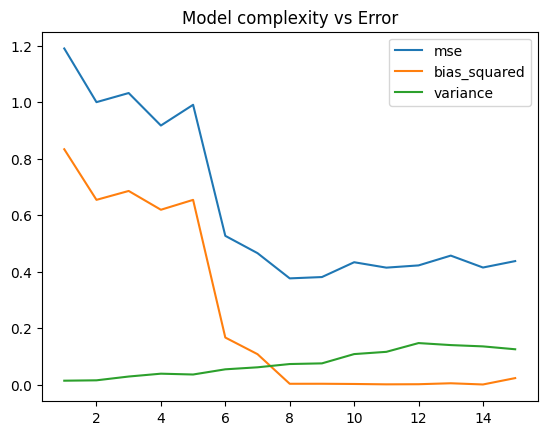

In [3]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# config
MU = 0
SIGMA = math.sqrt(0.3)
N = 50 # dataset size
N_test = 10
N_train = 40
XMAX = 10
M = 100 # number of datasets
DEGREE = 15 # try polynomial regression up to degree DEGREE

random.seed(21)
np.random.seed(21)

x = np.linspace(0, XMAX, N)
x = np.random.permutation(x)
X_train = np.array(x[:N_train])
X_test = np.array(x[N_train:])

def simulate(degree, X_train, X_test, regularize=False):

    y_preds = []
    y_tests = []

    for _ in range(M):
        # Generate dataset
        y_train = np.array([y_func(x, MU, SIGMA) for x in X_train])
        y_test = np.array([y_func(x, MU, SIGMA) for x in X_test])

        # Transform dataset
        poly_transformer = PolynomialFeatures(degree=degree)
        X_train_poly = poly_transformer.fit_transform(np.expand_dims(X_train, axis=1))
        X_test_poly = poly_transformer.transform(np.expand_dims(X_test, axis=1))

        # Train
        if regularize:
            model = Ridge(alpha=0.5).fit(X_train_poly, y_train)
        else:
            model = LinearRegression().fit(X_train_poly, y_train)

        # Predict
        y_pred = model.predict(X_test_poly)
        y_preds.append(y_pred)
        y_tests.append(y_test)

    y_preds = np.stack(y_preds, axis=0)
    y_tests = np.stack(y_tests, axis=0)
    f = np.array([f_func(x) for x in X_test])

    # compute MSE
    mse = mean_squared_error(y_tests, y_preds)

    # compute bias-squared
    exp_preds = np.mean(y_preds, axis=0)

    bias_squared = np.mean(np.square(f - exp_preds))
    variance = np.mean(np.mean(np.square(exp_preds - y_preds), axis=0))
    computed_noise = mse - (bias_squared + variance)
    
    return {
        "mse": float(mse), 
        "bias_squared": float(bias_squared), 
        "variance": float(variance), 
        "computed_noise": float(computed_noise),
    }


results_map = {}

for d in range(1, DEGREE + 1):
    results_map[f"g_{d}"] = simulate(d, X_train, X_test)
    
results_df = pd.DataFrame(results_map)
display(results_df)
complexity = np.arange(1, 16)

# plot 
plt.title("Model complexity vs Error")
plt.plot(complexity, results_df.T["mse"].values, label="mse")
plt.plot(complexity, results_df.T["bias_squared"].values, label="bias_squared")
plt.plot(complexity, results_df.T["variance"].values, label="variance")
plt.legend()
plt.show()


The Best model has a polynomial degree of 8, where it has the lowest MSE and the optimal balance between bias_squared and variance.

### 1.5 Regularization


In [5]:
import warnings
warnings.filterwarnings("ignore")

results_map = {}

results_map[f"g_10"] = simulate(10, X_train, X_test, False)
results_map[f"g_10_L2"] = simulate(10, X_train, X_test, True)

results_df = pd.DataFrame(results_map)
results_df

,g_10,g_10_L2
mse,0.408168,0.376128
bias_squared,0.001975,0.015525
variance,0.090800,0.077387
computed_noise,0.315392,0.283216


Going from the unregularized order 10 polynomial model to regularized model, 

1. MSE decreased slightly
2. $Bias^2$ increased
3. Variance decreased

Therefore, the regularized model has a higher bias, lower variance, and lower MSE. 

This is because the regularized model penalized complex model with larger coefficients, so that the model doesn't fit too closely to the data. This leads to better generalization to unseen data. Thus, it results in lower MSE on testing dataset. Bias increased because regularization simplified the model, and variance decreased because it limited the model's complexity. 

## Problem 2 - Precision, Recall, ROC

### 2.1

Q: Does true negative matter for both ROC and PR curve? Argue why each point on ROC curve corresponds to an unique point on PR curve. 

A: True negative is important in the calculation of false positive rate (FPR), which is the x-axis of the ROC curve. However, true negative does not matter for PR curve since precision and recall metrics don't use true negative in their calculation. Each point on ROC curve corresponds to an unqiue point on PR curve because both corresponding points depend on the same set of predictions at a certain threshold. These predictions at a certain threshold form a specific confusion matrix, which consists of TP, TN, FP, FN that are directly used to calculate precision, recall, false positive rate, and true positive rate. Precision and recalls are used to plot PR curve, and FPR and TPR are used to plot ROC curve.

### 2.2

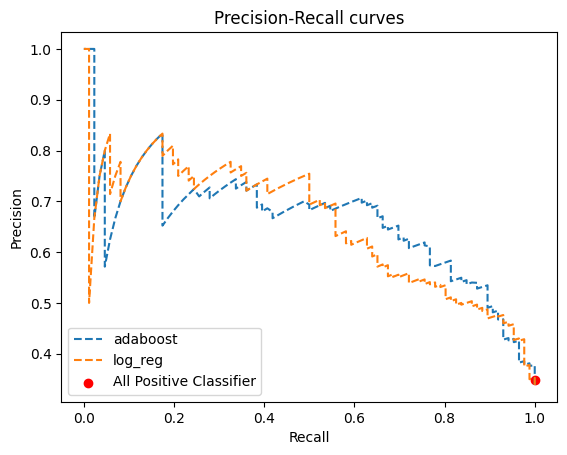

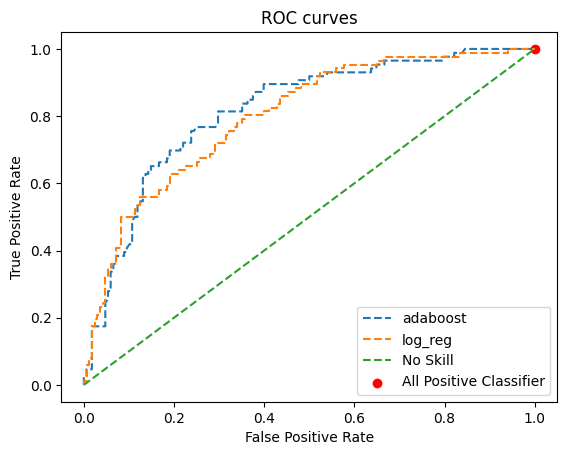

In [6]:
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc
from sklearn.metrics._ranking import _binary_clf_curve

# load data
arff_file = arff.loadarff('dataset_37_diabetes.arff')
prob2_2_data = pd.DataFrame(arff_file[0])
prob2_2_data['class'] = prob2_2_data['class'].map({b"tested_positive": 1, b"tested_negative": 0})
X = prob2_2_data[[col for col in prob2_2_data.columns if col != 'class']]
y = prob2_2_data['class'].values

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def make_pipe(model_name, model):
    return Pipeline([("scaler", StandardScaler()), (model_name, model)])

results_map = {}
models = [
    ("adaboost", AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)), 
    ("log_reg", LogisticRegression()), 
]

for model_name, model in models:
    pipe = make_pipe(model_name, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
    auroc = auc(fpr, tpr)
    aupr = auc(recall, precision)
    pi = 268/768 # proportion of positives in dataset
    recallG = [float((r - pi) / ((1-pi)*r + 0.0001)) for r in recall]
    precisionG = [float((p - pi) / ((1-pi)*p + 0.0001)) for p in precision]
    auprg = auc(recallG, precisionG)
    results_map[model_name] = {
        "fpr": fpr, 
        "tpr": tpr, 
        "precision": precision, 
        "recall": recall, 
        "thresholds_pr": thresholds_pr, 
        "thresholds_roc": thresholds_roc, 
        "auroc": auroc, 
        "aupr": aupr, 
        "auprg": auprg, 
    }

plt.title("Precision-Recall curves")
plt.plot(results_map["adaboost"]["recall"], results_map["adaboost"]["precision"], '--', label="adaboost", )
plt.plot(results_map["log_reg"]["recall"], results_map["log_reg"]["precision"], '--', label="log_reg", )
plt.scatter([1], [pi], label="All Positive Classifier", color="red")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc="lower left")
plt.show()

plt.title("ROC curves")
plt.plot(results_map["adaboost"]["fpr"], results_map["adaboost"]["tpr"], '--', label="adaboost", )
plt.plot(results_map["log_reg"]["fpr"], results_map["log_reg"]["tpr"], '--', label="log_reg", )
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), '--', label="No Skill")
plt.scatter([1], [1], label="All Positive Classifier", color="red")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()


Note: For all positive classifier, we have 

TPR = 1; FPR = 1; Precision = $\frac{P}{(P + N)}$ = $\frac{268}{768}$; Recall = 1

### 2.3 PR gain curve

In [7]:
print(f"AUROC for adaboost {results_map["adaboost"]["auroc"]}")
print(f"AUPR for adaboost {results_map["adaboost"]["aupr"]}")
print(f"AUPRG for adaboost {results_map["adaboost"]["auprg"]}")

print(f"AUROC for logistic regression {results_map["log_reg"]["auroc"]}")
print(f"AUPR for logistic regression {results_map["log_reg"]["aupr"]}")
print(f"AUPRG for logistic regression {results_map["log_reg"]["auprg"]}")

AUROC for adaboost 0.8160991140642303
AUPR for adaboost 0.6583825843463507
AUPRG for adaboost 3484.9656016837307
AUROC for logistic regression 0.7994878183831672
AUPR for logistic regression 0.6522517882377267
AUPRG for logistic regression 3476.754018649303


I disagree that PR gain curves should be used over PR curves. There could be unstable values that fall into the negative range when calculating the precision gain and recall gain values. In that case, my AUPRG value ends up becoming larger than 1.

## Problem 3 - Learning Rate, Batch Size, FashionMNIST

### 3.1

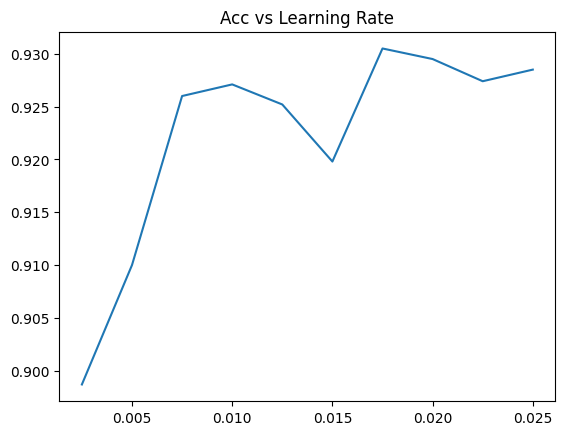

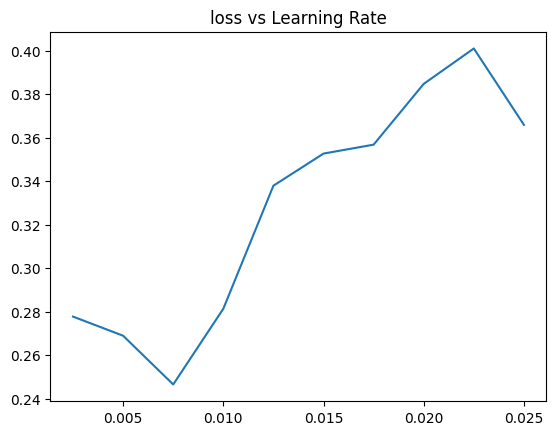

In [8]:
import json

with open("prob3_1_results_1.json", "r") as f:
    prob3_1_results = json.load(f)


lrs = []
accs = []
losses = []
for i, results in prob3_1_results.items():
    lrs.append(results["lr"])
    accs.append(results["val_acc"][-1])
    losses.append(results["val_loss"][-1])

prob3_1_results_df = pd.DataFrame({"lr": lrs, "acc": accs, "loss": losses})
prob3_1_results_df.sort_values(["lr"], inplace=True)


plt.title("Acc vs Learning Rate")
plt.plot(prob3_1_results_df["lr"], prob3_1_results_df["acc"])
plt.show()

plt.title("loss vs Learning Rate")
plt.plot(prob3_1_results_df["lr"], prob3_1_results_df["loss"])
plt.show()

$lr_{min}$ = 0.0025

$lr_{max}$ = 0.01


### 3.2

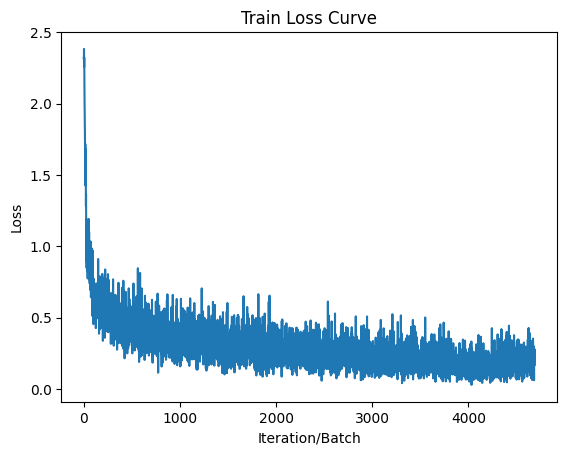

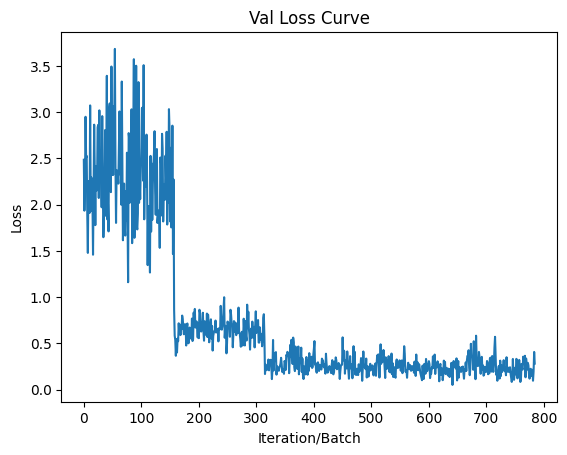

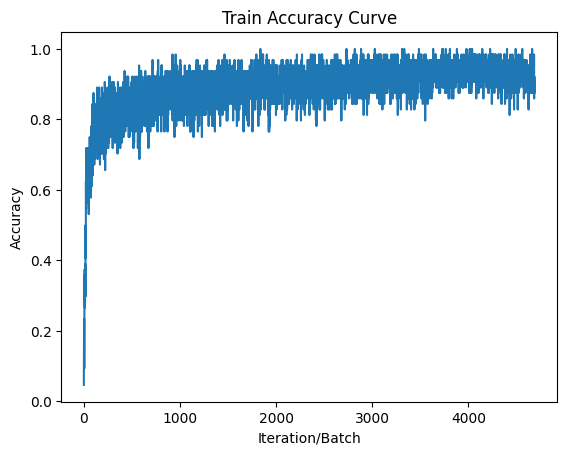

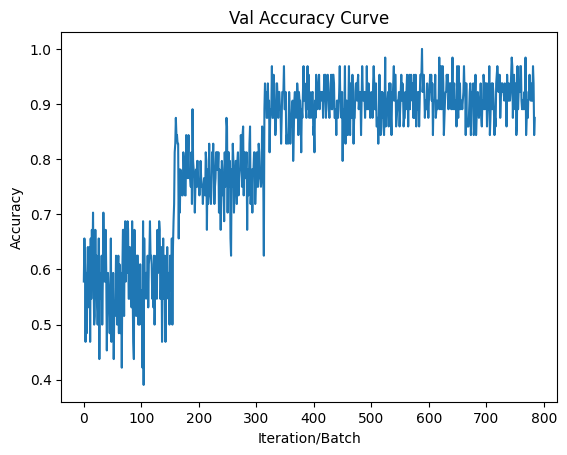

In [9]:
with open("prob3_2_results_1.json", "r") as f:
    prob3_2_results = json.load(f)

num_iteration_train = np.arange(len(prob3_2_results["train_batch_losses"]))
num_iteration_val = np.arange(len(prob3_2_results["val_batch_losses"]))

plt.title("Train Loss Curve")
plt.plot(num_iteration_train, prob3_2_results["train_batch_losses"])
plt.xlabel("Iteration/Batch")
plt.ylabel("Loss")
plt.show()

plt.title("Val Loss Curve")
plt.plot(num_iteration_val, prob3_2_results["val_batch_losses"])
plt.xlabel("Iteration/Batch")
plt.ylabel("Loss")
plt.show()



plt.title("Train Accuracy Curve")
plt.plot(num_iteration_train, prob3_2_results["train_batch_accs"])
plt.xlabel("Iteration/Batch")
plt.ylabel("Accuracy")
plt.show()


plt.title("Val Accuracy Curve")
plt.plot(num_iteration_val, prob3_2_results["val_batch_accs"])
plt.xlabel("Iteration/Batch")
plt.ylabel("Accuracy")
plt.show()


### 3.3

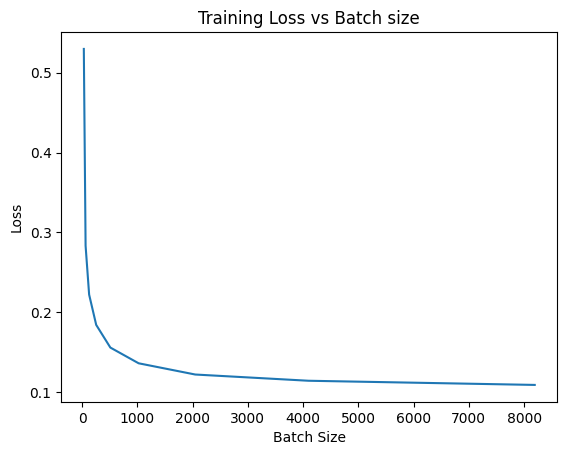

In [10]:
with open("prob3_3_results.json", "r") as f:
    prob3_3_results = json.load(f)

train_losses = prob3_3_results["train_loss"]
batch_size = 32
batch_sizes = []
while batch_size <= 8192:
    batch_sizes.append(batch_size)
    batch_size *= 2

# each epoch uses one batch_size
# epoch0: 32
# epoch1: 64
# ...
plt.title("Training Loss vs Batch size")
plt.plot(batch_sizes, train_losses)
plt.xlabel("Batch Size")
plt.ylabel("Loss")
plt.show()

The final model from problem 3.3 as shown in the plot above is similar to the Training Loss curve shown in the plot in Problem 3.2 with cyclical learning rate policy. They both show similar steep downward trend.


## Problem 4 - Convolutional Neural Networks Architectures

### 4.1

Table 1. VGG19 Activation units and paramteters calculation 

| Layer     | Number of Activations (Memory) | parameters (Compute) |
|:---------:|:------------------------------:|:--------------------:|
| Input     | 224 * 224 * 3 = 150K           | 0                    |
| Conv3-64  | 224 * 224 * 64 = 3.2M          | (3 * 3 * 3) * 64 = 1,728|
| Conv3-64  | 224 * 224 * 64 = 3.2M          | (3 * 3 * 64) * 64 = 36,864|
| Pool2     | 112 * 112 * 64 = 800K          | 0 |
| Conv3-128 | 112 * 112 * 128 = 1.6M         | (3 * 3 * 64) * 128 = 73,728  |
| Conv3-128 | 112 * 112 * 128 = 1.6M         | (3 * 3 * 128) * 128 = 147,456 |
| Pool2     | 56 * 56 * 128 = 400K           | 0 |
| Conv3-256 | 56 * 56 * 256 = 800K           | (3 * 3 * 128) * 256 = 294,912  |
| Conv3-256 | 56 * 56 * 256 = 800K           | (3 * 3 * 256) * 256 = 589,824  |
| Conv3-256 | 56 * 56 * 256 = 800K           | (3 * 3 * 256) * 256 = 589,824  |
| Conv3-256 | 56 * 56 * 256 = 800K           | (3 * 3 * 256) * 256 = 589,824  |
| Pool2     | 28 * 28 * 256 = 200K           | 0 |
| Conv3-512 | 28 * 28 * 512 = 400K           | (3 * 3 * 256) * 512 = 1,179,648 |
| Conv3-512 | 28 * 28 * 512 = 400K           | (3 * 3 * 512) * 512 = 2,359,296 |
| Conv3-512 | 28 * 28 * 512 = 400K           | (3 * 3 * 512) * 512 = 2,359,296 |
| Conv3-512 | 28 * 28 * 512 = 400K           | (3 * 3 * 512) * 512 = 2,359,296 |
| Pool2     | 14 * 14 * 512 = 100K           | 0 |
| Conv3-512 | 14 * 14 * 512 = 100K           | (3 * 3 * 512) * 512 = 2,359,296 |
| Conv3-512 | 14 * 14 * 512 = 100K           | (3 * 3 * 512) * 512 = 2,359,296 |
| Conv3-512 | 14 * 14 * 512 = 100K           | (3 * 3 * 512) * 512 = 2,359,296 |
| Conv3-512 | 14 * 14 * 512 = 100K           | (3 * 3 * 512) * 512 = 2,359,296 |
| Pool2     | 7 * 7 * 512 = 25K              | 0 |
| FC        | 4096                           | (7 * 7 * 512) * 4096 = 102,760,448 |
| FC        | 4096                           | 4096 * 4096 = 16,777,216 |
| FC        | 1000                           | 4096 * 1000 = 4,096,000  |
| TOTAL     | 16.5M                          | 143,652,544   |



### 4.2

(a) According to the Googlenet paper, the general idea behind designing an inception module in a CNN is based on finding out how an optimal local sparse structure in a convolutional vision network can be approximated and covered by readily available dense components.

(b) Calcuate output sizes

Naive version: 

Concatenate (32 x 32 x 128) + (32 x 32 x 192) + (32 x 32 x 96) + (32 x 32 x 256) at the channel/filter dimension
=> (32 x 32 x 672)

Dimension reductions version:

Concatenate 128 + 192 + 96 + 64 => (32 x 32 x 480)

(c) Calculate number of convolutional operations

Naive version: 

(1 * 1 * 256 * 128) + (3 * 3 * 256 * 192) + (5 * 5 * 256 * 96) + 0

= 32768 + 442368 + 614400

= 1,089,536


Dimension reductions version:

(1 * 1 * 256 * 128) + (1 * 1 * 256 * 128) + (3 * 3 * 128 * 192) + (1 * 1 * 256 * 32) + (5 * 5 * 32 * 96) + 0 + (1 * 1 * 256 * 64)

= 388,096

(d) How dimension reductions technique helps?

The inception module with dimension reductions technique is significantly faster than the naive architecture with much lower computational steps. The number of convolutional computation decreased from 1,089,536 to 388,096, which is a 701,440 operations reduction or 64.4% decrease.




## Problem 5 
Staleness at the start of the compute of the following gradients: 

$g[L_1, 1] = 0$

$g[L_1, 2] = 0$

$g[L_1, 3] = 1$

$g[L_1, 4] = 0$

$g[L_2, 1] = 2$

$g[L_2, 2] = 0$ (Since PS receives gradients and updates weights from $g[L_1, 4]$ and $g[L_2, 1]$ at the same time at second 5. The gradients read at the beginning of the compute of $g[L_2, 2]$ is not stale)

